In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading data
df=pd.read_csv("/content/drive/MyDrive/datasets/healthcare-dataset-stroke-data.csv")

In [3]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
#data description
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
#storing categorical values to a sep variable
cat_val=[x for x in df.columns if df[x].dtype=="O"]

In [6]:
#storing numerical values to a sep variable
num_val=[x for x in df.columns if x not in cat_val]

In [7]:
#separating variables 
cdf=df[cat_val]
ndf=df[num_val]

In [8]:
#value counts of categorical features
cdf.value_counts()

gender  ever_married  work_type     Residence_type  smoking_status 
Female  Yes           Private       Urban           never smoked       279
                                    Rural           never smoked       268
Male    No            children      Urban           Unknown            172
        Yes           Private       Rural           never smoked       156
        No            children      Rural           Unknown            154
                                                                      ... 
                      Never_worked  Urban           Unknown              2
Female  No            children      Rural           smokes               1
Male    No            Never_worked  Rural           never smoked         1
                      children      Urban           smokes               1
Other   No            Private       Rural           formerly smoked      1
Length: 118, dtype: int64

In [9]:
cdf.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [10]:
cdf.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [11]:
cdf.groupby("gender").smoking_status.value_counts().unstack() #never smoked counts for both male & female is high compared to other components 

smoking_status,Unknown,formerly smoked,never smoked,smokes
gender,,,,
Female,836.0,477.0,1229.0,452.0
Male,708.0,407.0,663.0,337.0
Other,NaN,1.0,NaN,NaN


In [12]:
cdf.drop_duplicates() #dropping duplicates

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
7,Female,No,Private,Urban,never smoked
...,...,...,...,...,...
2721,Female,No,Never_worked,Rural,never smoked
2917,Female,No,Never_worked,Urban,Unknown
3116,Other,No,Private,Rural,formerly smoked
3468,Male,No,Never_worked,Rural,never smoked


In [13]:
df.duplicated().value_counts()

False    5110
dtype: int64

In [14]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

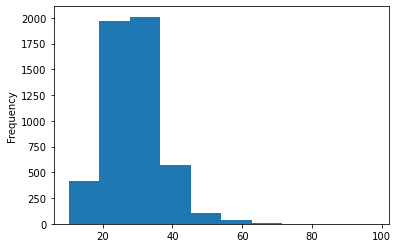

In [18]:
df.bmi.plot(kind="hist") #bmi is in normal distribution

In [16]:
df[df.bmi.isna()==True]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [17]:
import numpy as np

df.bmi.fillna(np.mean(df.bmi),inplace=True)#using mean to fill the null 

In [19]:
df.groupby("gender").stroke.value_counts().unstack() #male and female approximately got same level of strokes 

stroke,0,1
gender,,
Female,2853.0,141.0
Male,2007.0,108.0
Other,1.0,NaN


In [20]:
df=df[df.gender!="Other"] #removing other from gender

C:\Users\VENUHYMA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hypertension', ylabel='count'>

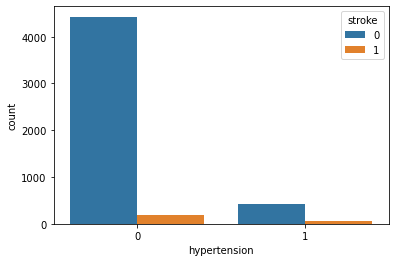

In [21]:
sns.countplot(df.hypertension,hue=df.stroke) #high chance of getting strokes if a person is having hypertension

C:\Users\VENUHYMA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

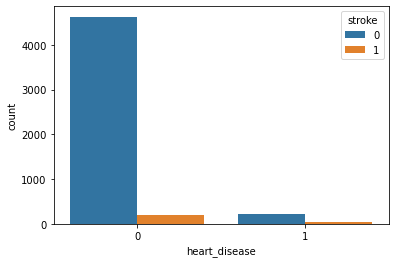

In [22]:
sns.countplot(df.heart_disease,hue=df.stroke)#high chance of getting strokes if a person is having heart disease

C:\Users\VENUHYMA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ever_married', ylabel='count'>

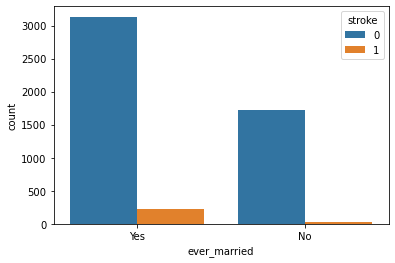

In [27]:
sns.countplot(df.ever_married,hue=df.stroke)#married has got high chance of getting stroke compared to singles 

<AxesSubplot:xlabel='work_type'>

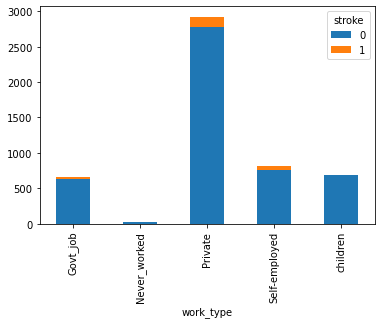

In [24]:
df.groupby("work_type").stroke.value_counts().unstack().plot(kind="bar",stacked=True) #private has high chance of getting stroke
#and then self emp and also little risk for govt job

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

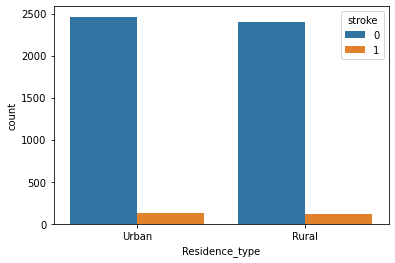

In [30]:
sns.countplot(x=df.Residence_type,hue=df.stroke) #there is no big change in this visualization 
#both from urban and rural has same amount of risk

In [50]:
df.groupby("Residence_type").stroke.value_counts(normalize=True).unstack() #above visualization with values 

stroke,0,1
Residence_type,,
Rural,0.954636,0.045364
Urban,0.947997,0.052003


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

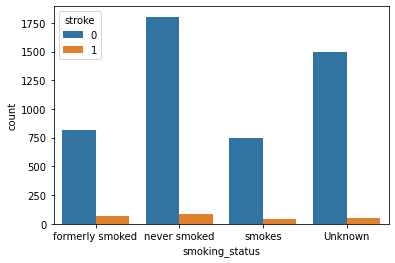

In [31]:
sns.countplot(x=df.smoking_status,hue=df.stroke)

In [56]:
df.groupby("smoking_status").stroke.value_counts(normalize=True).unstack()#above visualization with values 

stroke,0,1
smoking_status,,
Unknown,0.969560,0.030440
formerly smoked,0.920814,0.079186
never smoked,0.952431,0.047569
smokes,0.946768,0.053232


<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

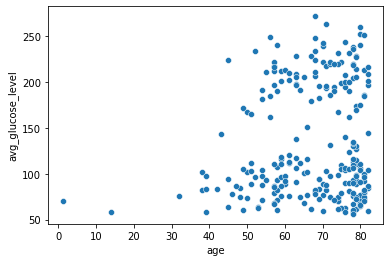

In [32]:
sns.scatterplot(x=df[df.stroke==1].age,y=df[df.stroke==1].avg_glucose_level)

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

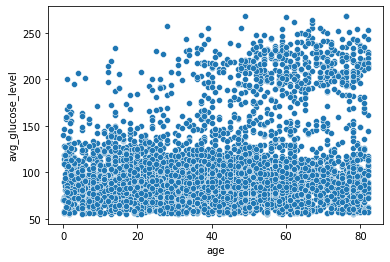

In [33]:
sns.scatterplot(x=df[df.stroke==0].age,y=df[df.stroke==0].avg_glucose_level)

<AxesSubplot:xlabel='age', ylabel='bmi'>

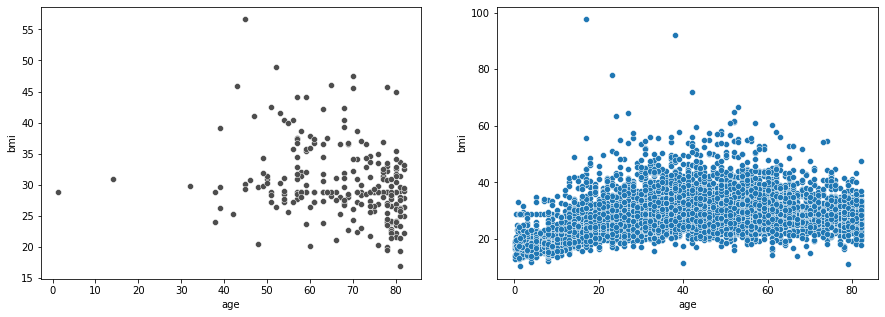

In [55]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

sns.scatterplot(x=df[df.stroke==1].age,y=df[df.stroke==1].bmi,color=".3")
plt.subplot(1,2,2)

sns.scatterplot(x=df[df.stroke==0].age,y=df[df.stroke==0].bmi)

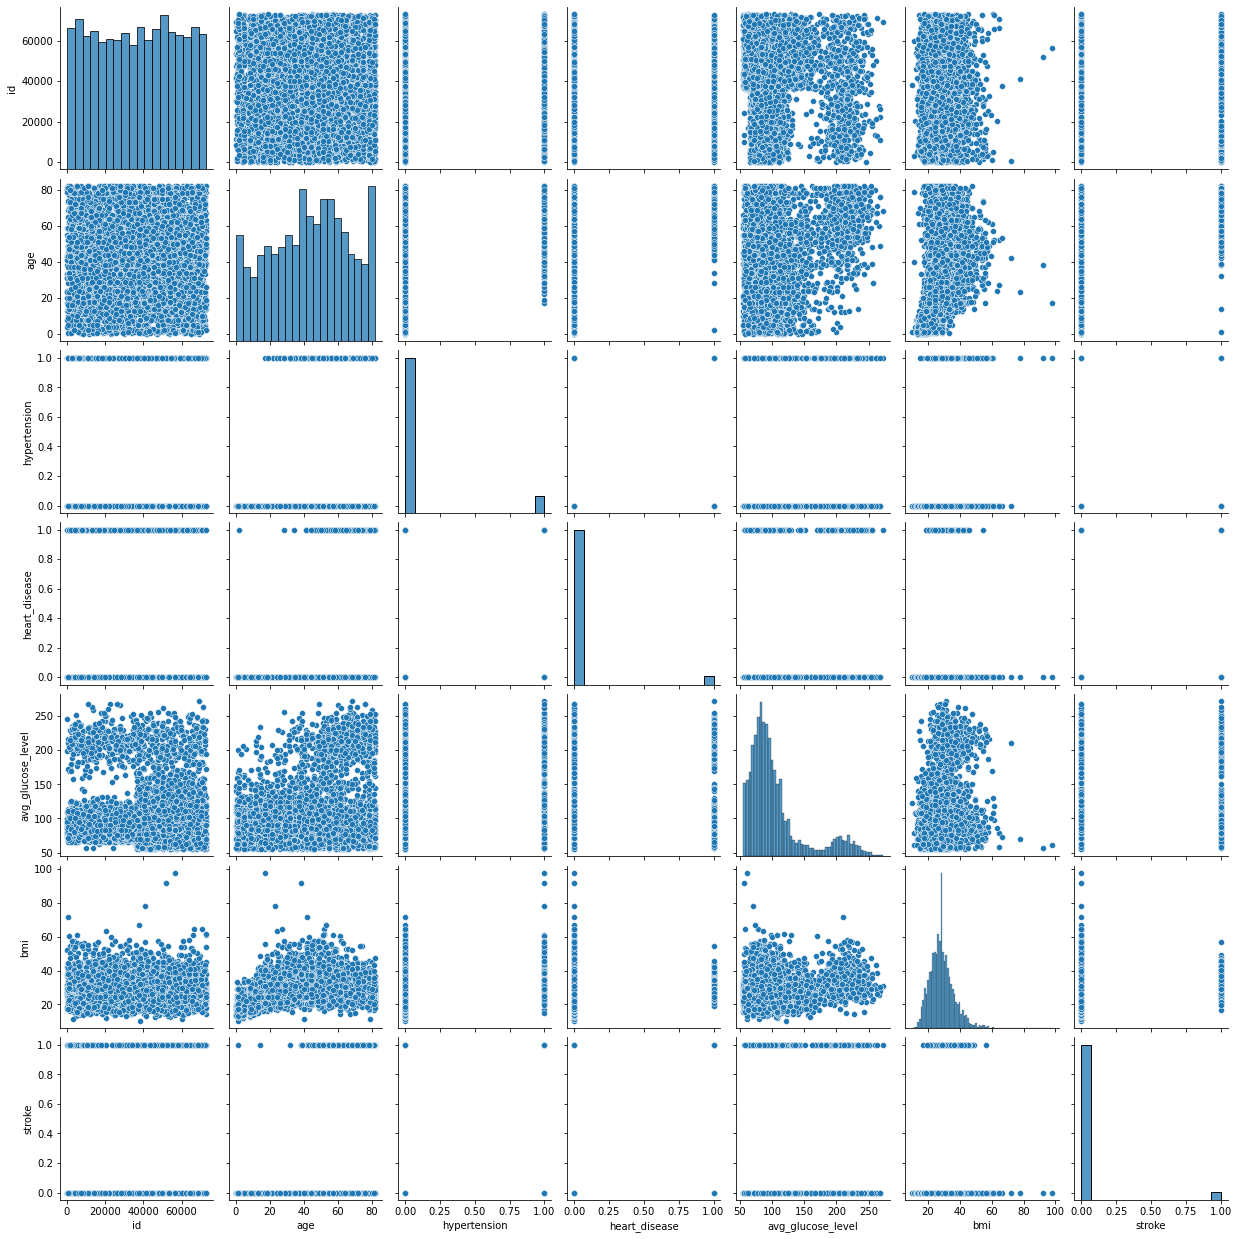

In [43]:
sns.pairplot(df)

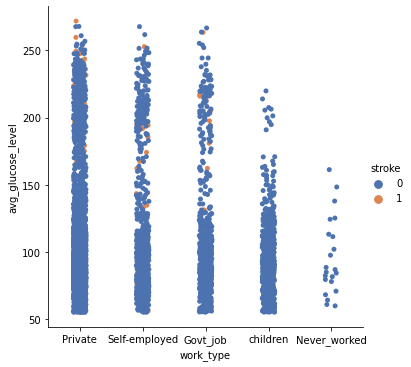

In [58]:
sns.catplot(x='work_type',y='avg_glucose_level',hue='stroke',data=df,palette="deep") 